In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443
...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79,2625,18.6,1982,ford ranger,11.904024


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
data.shape

(398, 9)

In [6]:
data.Kilometer_per_liter.describe()

count    398.000000
mean       9.997073
std        3.322917
min        3.826293
25%        7.440015
50%        9.778305
75%       12.329168
max       19.811697
Name: Kilometer_per_liter, dtype: float64

In [7]:
data.isnull().sum() #no misssing values

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

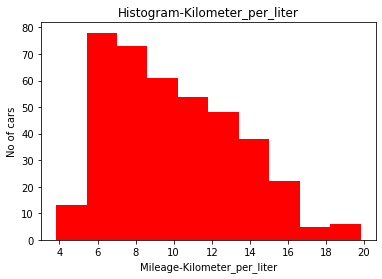

In [8]:
plt.hist(data.Kilometer_per_liter,color='red')
plt.xlabel('Mileage-Kilometer_per_liter')
plt.ylabel('No of cars')
plt.title('Histogram-Kilometer_per_liter')
plt.show()

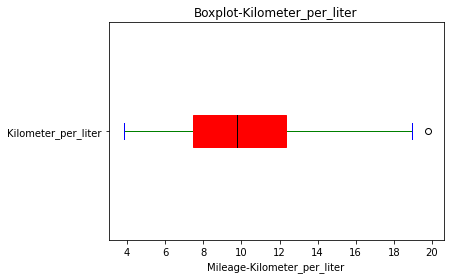

In [9]:
props2=dict(boxes='red',whiskers='green',medians='black',caps='blue')
data['Kilometer_per_liter'].plot.box(color=props2,patch_artist=True,vert=False)
plt.xlabel('Mileage-Kilometer_per_liter')
plt.title('Boxplot-Kilometer_per_liter')
plt.show()

In [10]:
kpl_IQR=data.Kilometer_per_liter.describe()['75%']-data.Kilometer_per_liter.describe()['25%']
kpl_uplim=data.Kilometer_per_liter.describe()['75%']+1.5*kpl_IQR
len(data.Kilometer_per_liter[data.Kilometer_per_liter>kpl_uplim])#only 1 outlier ignore

1

In [11]:
#2-----origin
#country origin(given numbers only)
data.origin.value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [12]:
data.origin.value_counts().sum()

398

C:\Users\SURESH A\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


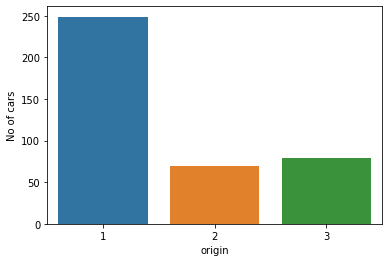

In [13]:
#barplot
sns.countplot(data.origin)
plt.ylabel('No of cars')
plt.show()

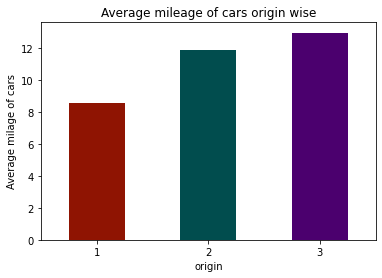

In [14]:
#Kilometer_per_liter (mileage) vs origin
data.groupby('origin')['Kilometer_per_liter'].mean().plot(kind='bar',color=['#8f1402','#014d4e','#4b006e'])
plt.ylabel('Average milage of cars')
plt.xticks(rotation=0)
plt.title('Average mileage of cars origin wise')
plt.show()

In [15]:
#cylinder
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [16]:
#3cylinder
#No of cylinder
data.cylinders.value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [17]:
data.cylinders.value_counts().sum()

398

C:\Users\SURESH A\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


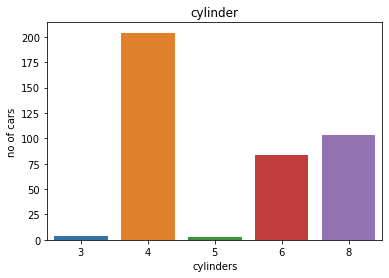

In [18]:
#barplot
sns.countplot(data.cylinders)
plt.ylabel('no of cars')
plt.title('cylinder')
plt.show()

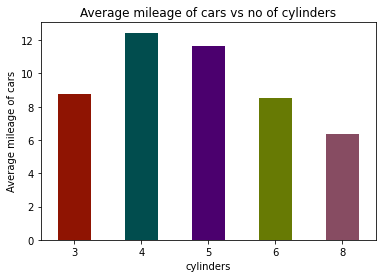

In [19]:
#kilometer _per_liter (milage)vs cylinder
data.groupby('cylinders')['Kilometer_per_liter'].mean().plot(kind='bar',color=['#8f1402','#014d4e','#4b006e','#677a04','#874c62'])
plt.ylabel('Average mileage of cars')
plt.xticks(rotation=0)
plt.title('Average mileage of cars vs no of cylinders')
plt.show()

In [20]:
#displacement
data.displacement.describe()

count    398.000000
mean     193.425879
std      104.269838
min       68.000000
25%      104.250000
50%      148.500000
75%      262.000000
max      455.000000
Name: displacement, dtype: float64

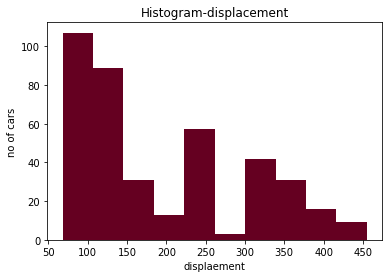

In [21]:
#Histogram
plt.hist(data.displacement,color='#650021')
plt.xlabel('displaement')
plt.ylabel('no of cars')
plt.title('Histogram-displacement')
plt.show()

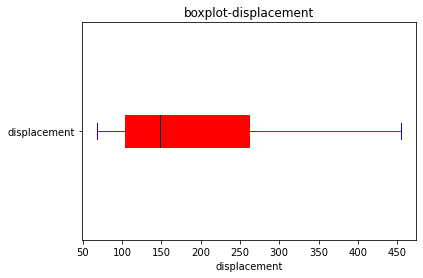

In [22]:
#Boxplot
data['displacement'].plot.box(color=props2,patch_artist=True,vert=False)
plt.xlabel('displacement')
plt.title('boxplot-displacement')
plt.show()


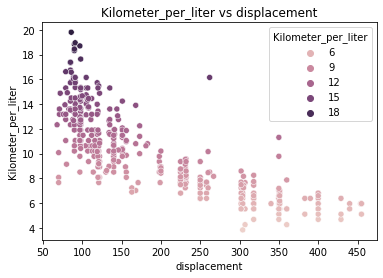

In [23]:
#scatter kilometer_per_liter vs displacement
sns.scatterplot(x='displacement',y='Kilometer_per_liter',data=data,hue='Kilometer_per_liter')
plt.title('Kilometer_per_liter vs displacement')
plt.show()

In [24]:
#hp
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [25]:
#convert the data type object to int64
data.horsepower=pd.to_numeric(data.horsepower,errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           392 non-null    float64
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [26]:
#some data points in hp variable are? they converted in to nan when
#datatype changed
data.horsepower.isnull().sum()#6 nan values

6

In [27]:
#removing nan values
data1=data.dropna()

In [28]:
data1.horsepower.isnull().sum()#no missing values
data1.shape# ie 6 nan values are removed

(392, 9)

In [30]:
data1.horsepower.isnull().sum()#no missing values

0

In [31]:
#distribution in horse power
data1.horsepower.describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

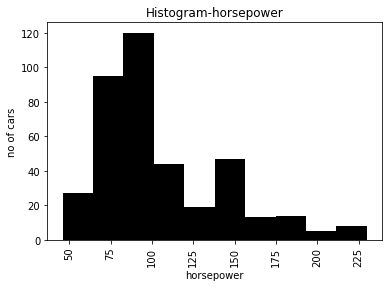

In [32]:
#histogram
plt.hist(data1.horsepower,color='BLACK')
plt.xlabel('horsepower')
plt.xticks(rotation=90)
plt.ylabel('no of cars')
plt.title('Histogram-horsepower')
plt.show()

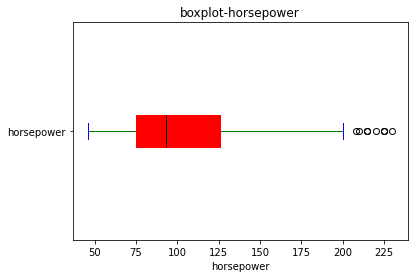

In [33]:
#boxplot
data1['horsepower'].plot.box(color=props2,patch_artist=True,vert=False)
plt.xlabel('horsepower')
plt.title('boxplot-horsepower')
plt.show()

In [34]:
#checking the outliers
hp_IQR=data1.horsepower.describe()['75%']-data1.horsepower.describe()['25%']
hp_uplim=data1.horsepower.describe()['75%']+1.5*hp_IQR
len(data1.horsepower[data1.horsepower>hp_uplim])#10 outliers IGNORE

10

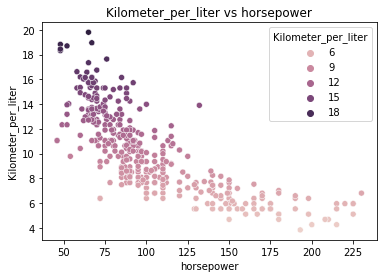

In [36]:
#scatterplot kilometer_per_liter vs horsepower
sns.scatterplot(x='horsepower',y='Kilometer_per_liter',data=data1,hue='Kilometer_per_liter')
plt.title('Kilometer_per_liter vs horsepower')
plt.show()

In [37]:
#weight
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               392 non-null    int64  
 1   cylinders            392 non-null    int64  
 2   displacement         392 non-null    float64
 3   horsepower           392 non-null    float64
 4   weight               392 non-null    int64  
 5   acceleration         392 non-null    float64
 6   year                 392 non-null    int64  
 7   name                 392 non-null    object 
 8   Kilometer_per_liter  392 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


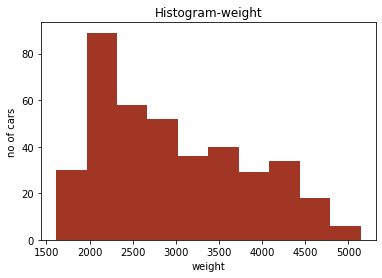

In [38]:
#histogram
plt.hist(data1.weight,color='#a03623')
plt.xlabel('weight')
plt.ylabel('no of cars')
plt.title('Histogram-weight')
plt.show()

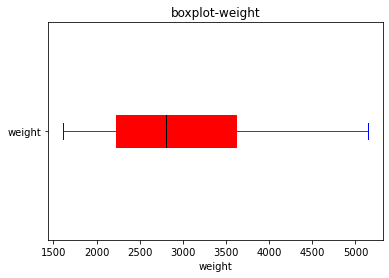

In [39]:
#boxplot
data1['weight'].plot.box(color=props2,patch_artist=True,vert=False)
plt.xlabel('weight')
plt.title('boxplot-weight')
plt.show()#no outliers

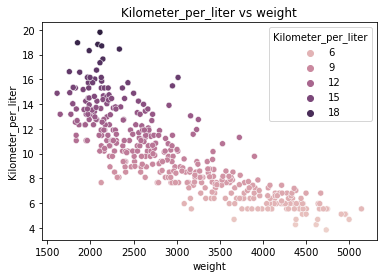

In [40]:
#scatterplot kilometer_per_liter vs weight
sns.scatterplot(x='weight',y='Kilometer_per_liter',data=data1,hue='Kilometer_per_liter')
plt.title('Kilometer_per_liter vs weight')
plt.show()

In [42]:
#acceleration
data1.acceleration.describe()

count    392.000000
mean      15.541327
std        2.758864
min        8.000000
25%       13.775000
50%       15.500000
75%       17.025000
max       24.800000
Name: acceleration, dtype: float64

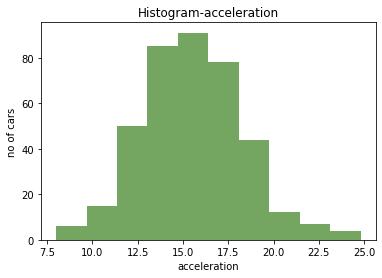

In [43]:
#histogram
plt.hist(data1.acceleration,color='#74a662')
plt.xlabel('acceleration')
plt.ylabel('no of cars')
plt.title('Histogram-acceleration')
plt.show()

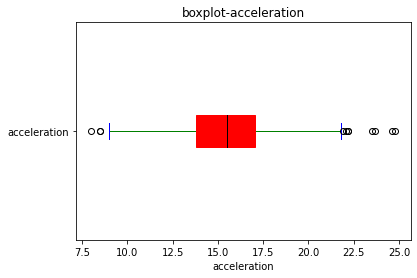

In [44]:
#boxplot
data1['acceleration'].plot.box(color=props2,patch_artist=True,vert=False)
plt.xlabel('acceleration')
plt.title('boxplot-acceleration')
plt.show()# outliers

In [45]:
#checking the outliers
acc_IQR=data1.acceleration.describe()['75%']-data1.acceleration.describe()['25%']
acc_uplim=data1.acceleration.describe()['75%']+1.5*acc_IQR
len(data1.acceleration[data1.acceleration>acc_uplim])#8 outliers IGNORE

8

In [46]:
acc_lowlim=data1.acceleration.describe()['25%']-1.5*acc_IQR
len(data1.acceleration[data1.acceleration<acc_lowlim])#3 outliers IGNORE

3

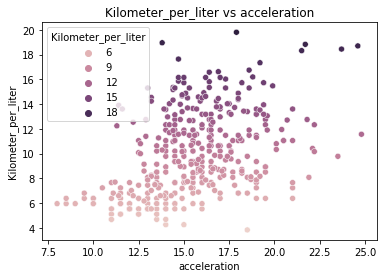

In [47]:
#scatterplot kilometer_per_liter vs acceleration
sns.scatterplot(x='acceleration',y='Kilometer_per_liter',data=data1,hue='Kilometer_per_liter')
plt.title('Kilometer_per_liter vs acceleration')
plt.show()

In [48]:
#year
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               392 non-null    int64  
 1   cylinders            392 non-null    int64  
 2   displacement         392 non-null    float64
 3   horsepower           392 non-null    float64
 4   weight               392 non-null    int64  
 5   acceleration         392 non-null    float64
 6   year                 392 non-null    int64  
 7   name                 392 non-null    object 
 8   Kilometer_per_liter  392 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [49]:
data1.year.describe()

count     392.000000
mean     1975.979592
std         3.683737
min      1970.000000
25%      1973.000000
50%      1976.000000
75%      1979.000000
max      1982.000000
Name: year, dtype: float64

C:\Users\SURESH A\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


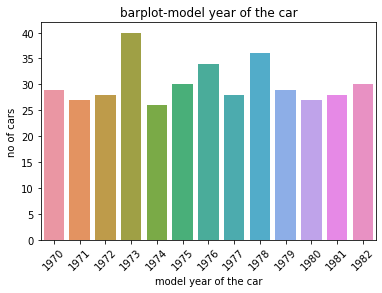

In [50]:
#Barplot
sns.countplot(data1.year)
plt.xlabel('model year of the car')
plt.xticks(rotation=45)
plt.ylabel('no of cars')
plt.title('barplot-model year of the car')
plt.show()

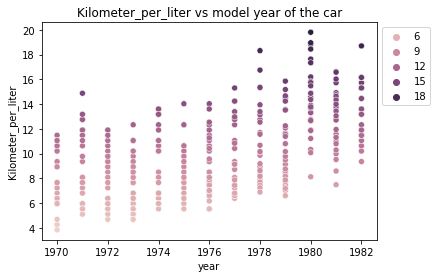

In [51]:
#scatterplot kilometer_per_liter vs year
sns.scatterplot(x='year',y='Kilometer_per_liter',data=data1,hue='Kilometer_per_liter')
plt.ylabel('Kilometer_per_liter')
plt.legend(bbox_to_anchor=(1,1),loc=2)
plt.title('Kilometer_per_liter vs model year of the car')
plt.show()

In [52]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               392 non-null    int64  
 1   cylinders            392 non-null    int64  
 2   displacement         392 non-null    float64
 3   horsepower           392 non-null    float64
 4   weight               392 non-null    int64  
 5   acceleration         392 non-null    float64
 6   year                 392 non-null    int64  
 7   name                 392 non-null    object 
 8   Kilometer_per_liter  392 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 38.7+ KB


In [53]:
#8 name
# car brand and model name(unique for each instance)
data1.name.describe()

count            392
unique           301
top       ford pinto
freq               5
Name: name, dtype: object

In [54]:
#Almost all are unique names
#Bad predictors

In [55]:
#heatmap
#to get the correlation values on heat map

origin                 0.565209
cylinders             -0.777618
displacement          -0.805127
horsepower            -0.778427
weight                -0.832244
acceleration           0.423329
year                   0.580541
Kilometer_per_liter    1.000000
Name: Kilometer_per_liter, dtype: float64

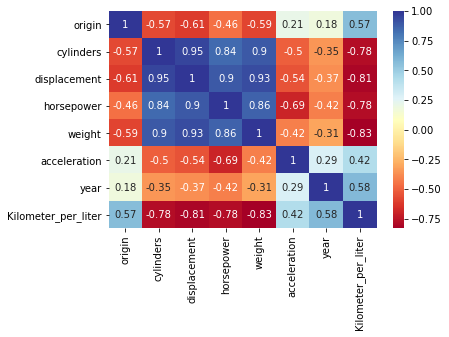

In [56]:
sns.heatmap(data1.corr(), annot=True, cmap='RdYlBu')
#correlation of target variable with predictors variables
data1.corr()['Kilometer_per_liter']

In [57]:
data1.info()
x=data1.iloc[:,:7]#name avoided as predictor
y=data1.Kilometer_per_liter

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               392 non-null    int64  
 1   cylinders            392 non-null    int64  
 2   displacement         392 non-null    float64
 3   horsepower           392 non-null    float64
 4   weight               392 non-null    int64  
 5   acceleration         392 non-null    float64
 6   year                 392 non-null    int64  
 7   name                 392 non-null    object 
 8   Kilometer_per_liter  392 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 38.7+ KB


In [59]:
x

,origin,cylinders,displacement,horsepower,weight,acceleration,year
0,1,8,307.0,130.0,3504,12.0,1970
1,1,8,350.0,165.0,3693,11.5,1970
2,1,8,318.0,150.0,3436,11.0,1970
3,1,8,304.0,150.0,3433,12.0,1970
4,1,8,302.0,140.0,3449,10.5,1970
...,...,...,...,...,...,...,...
393,1,4,140.0,86.0,2790,15.6,1982
394,2,4,97.0,52.0,2130,24.6,1982
395,1,4,135.0,84.0,2295,11.6,1982
396,1,4,120.0,79.0,2625,18.6,1982


In [60]:
y

0       7.652587
1       6.377156
2       7.652587
3       6.802299
4       7.227443
         ...    
393    11.478880
394    18.706323
395    13.604599
396    11.904024
397    13.179455
Name: Kilometer_per_liter, Length: 392, dtype: float64

In [61]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=0)

In [62]:
xtrain

,origin,cylinders,displacement,horsepower,weight,acceleration,year
220,3,4,85.0,70.0,1945,16.8,1977
256,1,6,225.0,100.0,3430,17.2,1978
301,1,4,105.0,70.0,2200,13.2,1979
193,1,6,200.0,81.0,3012,17.6,1976
57,3,4,113.0,95.0,2278,15.5,1972
...,...,...,...,...,...,...,...
325,2,4,90.0,48.0,2085,21.7,1980
194,1,6,232.0,90.0,3085,17.6,1976
118,2,4,116.0,75.0,2158,15.5,1973
48,1,6,250.0,88.0,3139,14.5,1971


In [63]:
xtest

,origin,cylinders,displacement,horsepower,weight,acceleration,year
146,1,4,90.0,75.0,2125,14.5,1974
282,1,4,140.0,88.0,2890,17.3,1979
69,1,8,350.0,160.0,4456,13.5,1972
378,1,4,105.0,63.0,2125,14.7,1982
331,3,4,97.0,67.0,2145,18.0,1980
...,...,...,...,...,...,...,...
101,1,6,198.0,95.0,2904,16.0,1973
65,1,8,351.0,153.0,4129,13.0,1972
56,1,4,91.0,70.0,1955,20.5,1971
262,1,8,305.0,145.0,3425,13.2,1978


In [64]:
xtrain,xtest,ytrain,ytest

(     origin  cylinders  displacement  horsepower  weight  acceleration  year
 220       3          4          85.0        70.0    1945          16.8  1977
 256       1          6         225.0       100.0    3430          17.2  1978
 301       1          4         105.0        70.0    2200          13.2  1979
 193       1          6         200.0        81.0    3012          17.6  1976
 57        3          4         113.0        95.0    2278          15.5  1972
 ..      ...        ...           ...         ...     ...           ...   ...
 325       2          4          90.0        48.0    2085          21.7  1980
 194       1          6         232.0        90.0    3085          17.6  1976
 118       2          4         116.0        75.0    2158          15.5  1973
 48        1          6         250.0        88.0    3139          14.5  1971
 174       1          6         171.0        97.0    2984          14.5  1975
 
 [313 rows x 7 columns],
      origin  cylinders  displacement

In [66]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               392 non-null    int64  
 1   cylinders            392 non-null    int64  
 2   displacement         392 non-null    float64
 3   horsepower           392 non-null    float64
 4   weight               392 non-null    int64  
 5   acceleration         392 non-null    float64
 6   year                 392 non-null    int64  
 7   name                 392 non-null    object 
 8   Kilometer_per_liter  392 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 38.7+ KB


In [67]:
#train test
#splitting the data in to train & test
from sklearn.model_selection import train_test_split


In [68]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=0)

In [69]:
#standardize the predictors
#standardized data (standardizing the data)-scaling(x-mean)/std
from sklearn.preprocessing import StandardScaler

In [70]:
SC_x=StandardScaler()

In [71]:
xtrain

,origin,cylinders,displacement,horsepower,weight,acceleration,year
220,3,4,85.0,70.0,1945,16.8,1977
256,1,6,225.0,100.0,3430,17.2,1978
301,1,4,105.0,70.0,2200,13.2,1979
193,1,6,200.0,81.0,3012,17.6,1976
57,3,4,113.0,95.0,2278,15.5,1972
...,...,...,...,...,...,...,...
325,2,4,90.0,48.0,2085,21.7,1980
194,1,6,232.0,90.0,3085,17.6,1976
118,2,4,116.0,75.0,2158,15.5,1973
48,1,6,250.0,88.0,3139,14.5,1971


In [72]:
xtest

,origin,cylinders,displacement,horsepower,weight,acceleration,year
146,1,4,90.0,75.0,2125,14.5,1974
282,1,4,140.0,88.0,2890,17.3,1979
69,1,8,350.0,160.0,4456,13.5,1972
378,1,4,105.0,63.0,2125,14.7,1982
331,3,4,97.0,67.0,2145,18.0,1980
...,...,...,...,...,...,...,...
101,1,6,198.0,95.0,2904,16.0,1973
65,1,8,351.0,153.0,4129,13.0,1972
56,1,4,91.0,70.0,1955,20.5,1971
262,1,8,305.0,145.0,3425,13.2,1978


In [73]:
xtrain = StandardScaler().fit_transform(xtrain)
xtest = StandardScaler().fit_transform(xtest)

In [77]:
data1.isnull().sum()

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

In [75]:
#dimensions of the datasets
xtrain.shape

(313, 7)

In [79]:
xtest.shape

(79, 7)

In [80]:
ytrain.shape

(313,)

In [81]:
ytest.shape

(79,)

In [82]:
#trainingb set predictors-standardized

In [83]:
#model
sgdr=SGDRegressor()
sgdr.fit(xtrain,ytrain)
score=sgdr.score(xtrain,ytrain)
print("R-squared:",score)#0.81432-this value keeps changing


R-squared: 0.8129478617578589


In [84]:
#prediction
y_pred=sgdr.predict(xtest)
mse=mean_squared_error(ytest, y_pred)
print("MSE :",mse)
print("RMSE :",np.sqrt(mse))
#y_pred# dont try output very large

MSE : 1.8123291453277728
RMSE : 1.3462277464559156


In [85]:
#Evaluating the prediction
mse=mean_squared_error(ytest,y_pred)
print('MSE:',mse)
print('RMSE:',np.sqrt(mse))  #MSE= 1.840  #RMSE=1.3566

MSE: 1.8123291453277728
RMSE: 1.3462277464559156


In [ ]:
#######

In [86]:
import statsmodels.api as sm

In [87]:
result = sm.OLS(y,x).fit()
prediction=result.predict(x)

result_details= result.summary()
print(result_details)

                                 OLS Regression Results                                 
Dep. Variable:     Kilometer_per_liter   R-squared (uncentered):                   0.973
Model:                             OLS   Adj. R-squared (uncentered):              0.972
Method:                  Least Squares   F-statistic:                              1965.
Date:                 Thu, 05 Aug 2021   Prob (F-statistic):                   8.07e-297
Time:                         09:19:51   Log-Likelihood:                         -771.83
No. Observations:                  392   AIC:                                      1558.
Df Residuals:                      385   BIC:                                      1585.
Df Model:                            7                                                  
Covariance Type:             nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [88]:
from sklearn.preprocessing import MinMaxScaler

###fit scaler on training data

In [90]:
Norm = MinMaxScaler().fit(xtrain)

In [91]:
# transform training data
xtrain_norm = Norm.transform(xtrain)
xtest_norm = Norm.transform(xtest)

In [92]:
print(xtrain_norm)

[[1.         0.2        0.04392765 ... 0.09413099 0.52380952 0.58333333]
 [0.         0.6        0.40568475 ... 0.5151687  0.54761905 0.66666667]
 [0.         0.2        0.09560724 ... 0.16643039 0.30952381 0.75      ]
 ...
 [0.5        0.2        0.12403101 ... 0.15452226 0.44642857 0.25      ]
 [0.         0.6        0.47028424 ... 0.43266232 0.38690476 0.08333333]
 [0.         0.6        0.26614987 ... 0.38871562 0.38690476 0.41666667]]


In [93]:
print(xtest_norm )

[[0.00787783 0.18885664 0.05396218 0.1568429  0.14925108 0.38968661
  0.37437003]
 [0.00787783 0.18885664 0.17506765 0.22266171 0.35600834 0.56460626
  0.78013152]
 [0.00787783 0.95490238 0.68371067 0.58719666 0.77925261 0.32721531
  0.21206543]
 [0.00787783 0.18885664 0.09029382 0.09608708 0.14925108 0.40218087
  1.02358842]
 [1.05308251 0.18885664 0.07091694 0.11633902 0.1546565  0.60833617
  0.86128382]
 [0.00787783 0.57187951 0.39790174 0.23278768 0.44249504 0.55835913
  0.69897922]
 [1.05308251 0.18885664 0.05154007 0.08089812 0.10681855 0.65831321
  0.86128382]
 [0.53048017 0.18885664 0.18960031 0.11633902 0.45330587 0.84572712
  0.86128382]
 [0.00787783 0.57187951 0.31555001 0.25810261 0.41330578 0.51462922
  0.37437003]
 [1.05308251 0.18885664 0.07091694 0.22266171 0.19087281 0.67080747
  0.29321773]
 [0.53048017 0.18885664 0.07091694 0.08089812 0.07060225 0.67080747
  0.13091313]
 [0.00787783 0.95490238 0.68371067 0.68845636 0.75871202 0.23975549
  0.53667462]
 [0.00787783 0.1

In [94]:
xtrain_stand = xtrain.copy()
xtest_stand = xtest.copy()
